<a href="https://colab.research.google.com/github/avacollins/tinker-toys/blob/main/cards_data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook

In [ ]:
!pip install -Uqq fastbook && pip install -U duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.9 MB/s eta 0:00:00


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from duckduckgo_search import DDGS

In [ ]:
ims = DDGS().images(
    keywords="playing cards",
    safesearch="off",
    license_image=None,
    max_results=100,
)

In [ ]:
print(ims[0]['image'])

http://www.wopc.co.uk/images/countries/usa/standard/standard-pcc-1-large.jpg


In [ ]:
def contentUrl(x):
  return x['image']

In [ ]:
urls = map(contentUrl, ims)
url_list = list(urls)
print(url_list)

['http://www.wopc.co.uk/images/countries/usa/standard/standard-pcc-1-large.jpg', 'http://clipart-library.com/images/BcgrbGk7i.jpg', 'http://www.publicdomainpictures.net/pictures/30000/velka/playing-cards.jpg', 'http://clipart-library.com/images/zcX5BGe9i.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/AcetoFive.JPG/1200px-AcetoFive.JPG', 'https://images.freeimages.com/images/large-previews/3e0/playing-cards-1259397.jpg', 'https://freepngimg.com/thumb/cards/1-playing-cards-png.png', 'https://freepngimg.com/thumb/cards/31-playing-cards-png.png', 'https://pixahive.com/wp-content/uploads/2020/10/Playing-cards-arranged-150217-pixahive.jpg', 'http://wallpapercave.com/wp/UHExKD4.jpg', 'https://www.cardcouture.co.uk/wp-content/uploads/2018/03/rose-uniacke-custom-playing-card-faces.jpg', 'https://www.wopc.co.uk/images/blog/2015/10/Moda90.jpg', 'https://cdn3.vectorstock.com/i/1000x1000/49/67/playing-cards-full-set-vector-3064967.jpg', 'https://images.freeimages.com/images/premiu

In [ ]:
dest = 'images/card.jpg'
download_url(ims[0]['image'], dest)

Path('images/card.jpg')

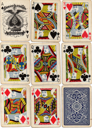

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
card_types = 'clubs', 'diamonds', 'hearts', 'spades'
path = Path('playing_card')

In [ ]:
if not path.exists():
    path.mkdir()

In [ ]:
def search_card(type):
  results = DDGS().images(
    keywords=type,
    safesearch="off",
    license_image=None,
    max_results=100,
  )
  urls = map(contentUrl, results)
  url_list = list(urls)
  print(url_list)
  return url_list

for o in card_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  term = f'{o} playing card'
  print(term)
  urls = search_card(term)
  download_images(dest, urls=urls)

clubs playing card
['https://c8.alamy.com/comp/2H8FG36/two-of-clubs-playing-card-isolated-illustration-2H8FG36.jpg', 'https://c8.alamy.com/comp/2B18B1D/king-of-clubs-vintage-playing-card-isolated-on-white-clipping-path-included-2B18B1D.jpg', 'https://c8.alamy.com/comp/RRND1N/playing-cards-of-clubs-suit-isolated-on-white-background-high-quality-RRND1N.jpg', 'https://thumbs.dreamstime.com/z/classic-playing-cards-clubs-7682224.jpg', 'https://thumbs.dreamstime.com/b/jack-clubs-playing-card-isolated-black-background-86724239.jpg', 'https://c8.alamy.com/comp/C7A9PW/clubs-suit-in-a-playing-deck-of-cards-isolated-on-black-C7A9PW.jpg', 'https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/4d364ce1-cddf-46f1-8a9d-c0e8cc9c36cc/dawrvll-4e2db68b-cbac-4eee-b677-e34191a5cabf.png/v1/fill/w_1024,h_1364,q_80,strp/my_playing_cards_v2___king_of_clubs_by_gabe0530_dawrvll-fullview.jpg?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoi

In [ ]:
fns = get_image_files(path)
len(fns)

361

In [ ]:
failed = verify_images(fns)
failed

(#5) [Path('playing_card/spades/57ed0f43-5995-4d4d-9da9-761a36b0ca62.jpeg'),Path('playing_card/spades/ccc616c5-069c-4df1-bdae-c26b46d24dca.png'),Path('playing_card/spades/ad78289f-72f6-4a36-a4b9-5fd5325fc1d6.jpg'),Path('playing_card/spades/fd2082f6-5e7d-4d9f-a369-cdefc81f66fb.jpg'),Path('playing_card/hearts/0db7cb0e-c704-444e-8793-5cedb1662a89.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
cards = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=41),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = cards.dataloaders(path)

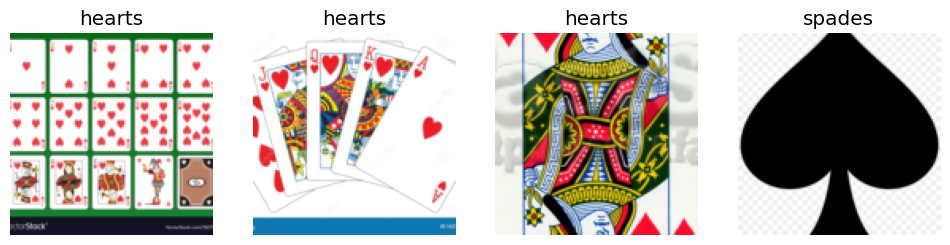

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

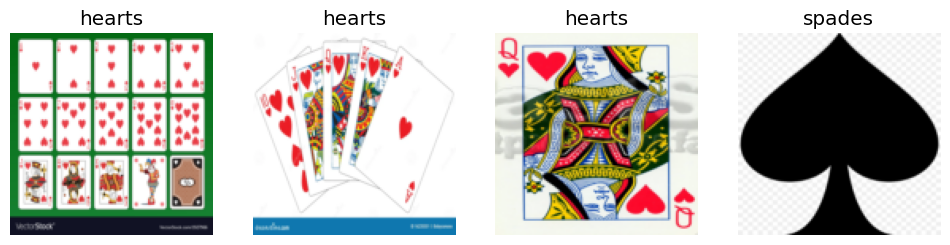

In [ ]:
cards = cards.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

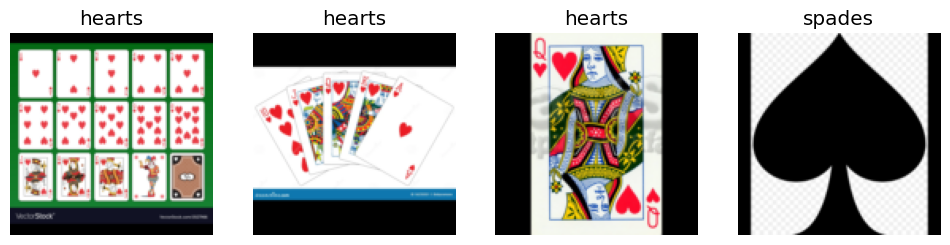

In [ ]:
cards = cards.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

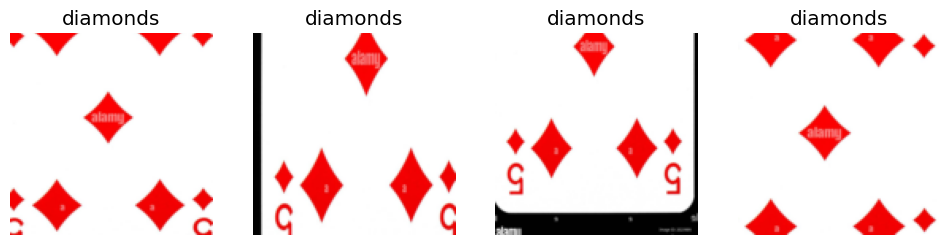

In [ ]:
cards = cards.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cards.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

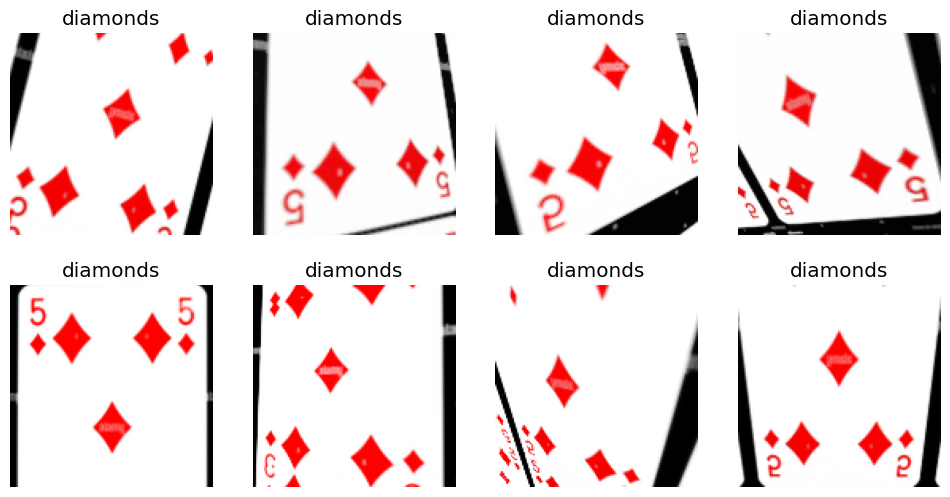

In [ ]:
cards = cards.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cards.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
cards = cards.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cards.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.479112,1.495038,0.563380,01:21


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.623713,1.090040,0.408451,01:48
1,1.366628,0.820331,0.323944,01:44
2,1.143242,0.685054,0.211268,01:44
3,0.997751,0.627798,0.197183,01:44


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

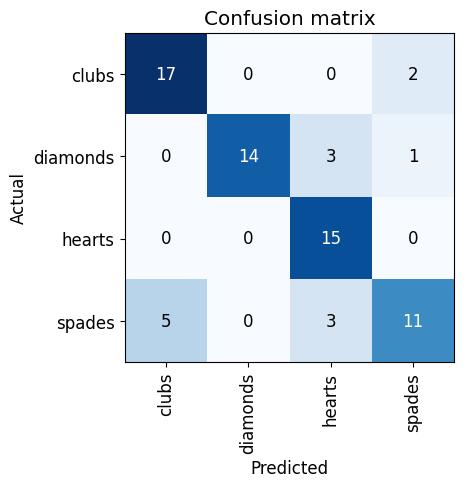

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

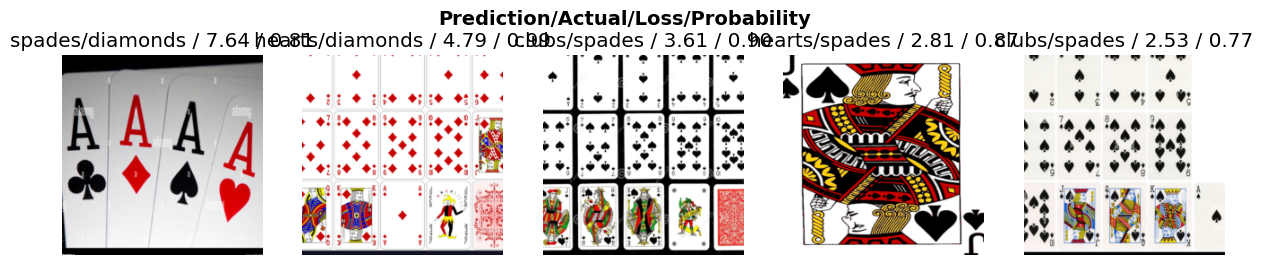

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
    from google.colab import files
    files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>